In [223]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
 
## This statement allows the visuals to render within your Jupyter Notebook.
%matplotlib inline

## Loading the data


In [224]:

df15 =pd.read_csv('Data/2015.csv')
df16 =pd.read_csv('Data/2016.csv')
df17 =pd.read_csv('Data/2017.csv')
#Unifying column names
df17.rename(columns = {'Happiness.Rank' : 'Happiness Rank',
                        'Happiness.Score' : 'Happiness Score',
                        'Economy..GDP.per.Capita.' : 'Economy (GDP per Capita)',
                        'Health..Life.Expectancy.' : 'Health (Life Expectancy)',
                        'Dystopia.Residual' : 'Dystopia Residual',
                        'Trust..Government.Corruption.' : 'Trust (Government Corruption)'}, inplace = True)
df=pd.concat(([df15, df16, df17]), ignore_index=True)

### Viewing the dataframe
We can get a quick sense of the size of our dataset by using the shape method. This returns a tuple with the number of rows and columns in the dataset.

In [225]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Lower Confidence Interval,Upper Confidence Interval,Whisker.high,Whisker.low
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,NaN,NaN,NaN,NaN
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,NaN,NaN,NaN,NaN
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,NaN,NaN,NaN,NaN
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,NaN,NaN,NaN,NaN
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,NaN,NaN,NaN,NaN


In [226]:
df.shape

(470, 16)

In [227]:
df.size

7520

In [228]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual', 'Lower Confidence Interval',
       'Upper Confidence Interval', 'Whisker.high', 'Whisker.low'],
      dtype='object')

## 1. Data Profiling:
Data profiling is a comprehensive process of examining the data available in an existing dataset and collecting statistics and information about that data. 

In [229]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Lower Confidence Interval,Upper Confidence Interval,Whisker.high,Whisker.low
count,470.000000,470.000000,158.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,157.000000,157.000000,155.000000,155.000000
mean,78.829787,5.370728,0.047885,0.927830,0.990347,0.579968,0.402828,0.134790,0.242241,2.092717,5.282395,5.481975,5.452326,5.255713
std,45.281408,1.136998,0.017146,0.415584,0.318707,0.240161,0.150356,0.111313,0.131543,0.565772,1.148043,1.136493,1.118542,1.145030
min,1.000000,2.693000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580,2.732000,3.078000,2.864884,2.521116
25%,40.000000,4.509000,0.037268,0.605292,0.793000,0.402301,0.297615,0.059777,0.152831,1.737975,4.327000,4.465000,4.608172,4.374955
50%,79.000000,5.282500,0.043940,0.995439,1.025665,0.630053,0.418347,0.099502,0.223140,2.094640,5.237000,5.419000,5.370032,5.193152
75%,118.000000,6.233750,0.052300,1.252443,1.228745,0.768298,0.516850,0.173161,0.315824,2.455575,6.154000,6.434000,6.194600,6.006527
max,158.000000,7.587000,0.136930,1.870766,1.610574,1.025250,0.669730,0.551910,0.838075,3.837720,7.460000,7.669000,7.622030,7.479556


In [230]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        470 non-null    object 
 1   Region                         315 non-null    object 
 2   Happiness Rank                 470 non-null    int64  
 3   Happiness Score                470 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       470 non-null    float64
 6   Family                         470 non-null    float64
 7   Health (Life Expectancy)       470 non-null    float64
 8   Freedom                        470 non-null    float64
 9   Trust (Government Corruption)  470 non-null    float64
 10  Generosity                     470 non-null    float64
 11  Dystopia Residual              470 non-null    float64
 12  Lower Confidence Interval      157 non-null    flo

### Data Quality Checks


**Here are typical steps involved in checking data quality:**

#### 1. Reliability:


In [231]:
# SUSTAINABLE DEVELOPMENT SOLUTIONS NETWORK 

#### 2. Timeliness: 


In [232]:
# UPDATED 4 YEARS AGO (2019)

#### 3. Consistency: 



In [233]:
#It is only from Kaggle that the source is available

#### 4. Relevance: 


In [234]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Lower Confidence Interval,Upper Confidence Interval,Whisker.high,Whisker.low
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,NaN,NaN,NaN,NaN
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,NaN,NaN,NaN,NaN
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,NaN,NaN,NaN,NaN
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,NaN,NaN,NaN,NaN
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,NaN,NaN,NaN,NaN


In [235]:
df.shape

(470, 16)

In [236]:
df15['Years'] = 2015
df16['Years'] = 2016
df17['Years'] = 2017


In [237]:
df15['Years']

0      2015
1      2015
2      2015
3      2015
4      2015
       ... 
153    2015
154    2015
155    2015
156    2015
157    2015
Name: Years, Length: 158, dtype: int64

In [238]:
df=pd.concat(([df15, df16, df17]), ignore_index=True)

In [239]:
#df.drop(["Whisker.high"],axis=1,inplace=True)

In [240]:
#df.drop(["Whisker.low"],axis=1,inplace=True)

In [241]:

#df.drop(["Lower Confidence Interval"],axis=1,inplace=True)
#df.drop(["Upper Confidence Interval"],axis=1,inplace=True)

In [242]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Years,Lower Confidence Interval,Upper Confidence Interval,Whisker.high,Whisker.low
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015,NaN,NaN,NaN,NaN
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015,NaN,NaN,NaN,NaN
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015,NaN,NaN,NaN,NaN
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015,NaN,NaN,NaN,NaN
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015,NaN,NaN,NaN,NaN


In [243]:
 df[df[['Standard Error', 'Whisker.high']].isnull().all(axis=1)]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Years,Lower Confidence Interval,Upper Confidence Interval,Whisker.high,Whisker.low
158,Denmark,Western Europe,1,7.526,NaN,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939,2016,7.460,7.592,NaN,NaN
159,Switzerland,Western Europe,2,7.509,NaN,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463,2016,7.428,7.590,NaN,NaN
160,Iceland,Western Europe,3,7.501,NaN,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137,2016,7.333,7.669,NaN,NaN
161,Norway,Western Europe,4,7.498,NaN,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465,2016,7.421,7.575,NaN,NaN
162,Finland,Western Europe,5,7.413,NaN,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596,2016,7.351,7.475,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,Benin,Sub-Saharan Africa,153,3.484,NaN,0.39499,0.10419,0.21028,0.39747,0.06681,0.20180,2.10812,2016,3.404,3.564,NaN,NaN
311,Afghanistan,Southern Asia,154,3.360,NaN,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558,2016,3.288,3.432,NaN,NaN
312,Togo,Sub-Saharan Africa,155,3.303,NaN,0.28123,0.00000,0.24811,0.34678,0.11587,0.17517,2.13540,2016,3.192,3.414,NaN,NaN
313,Syria,Middle East and Northern Africa,156,3.069,NaN,0.74719,0.14866,0.62994,0.06912,0.17233,0.48397,0.81789,2016,2.936,3.202,NaN,NaN


In [244]:
df[['Standard Error','Whisker.high','Whisker.low']].isnull().sum()

Standard Error    312
Whisker.high      315
Whisker.low       315
dtype: int64

In [273]:
df.loc[df['Standard Error'].isnull() & df['Whisker.high'].isnull() & df['Whisker.low'].isnull(), ['Standard Error']] = round((df['Upper Confidence Interval'] - df['Lower Confidence Interval']) / 2, 3)


In [277]:
df[['Standard Error','Whisker.high','Whisker.high']].isnull().sum()

Standard Error    155
Whisker.high      315
Whisker.high      315
dtype: int64

In [278]:
df[['Standard Error','Lower Confidence Interval','Upper Confidence Interval']].isnull().sum()

Standard Error               155
Lower Confidence Interval    313
Upper Confidence Interval    313
dtype: int64

In [280]:
df.loc[df['Standard Error'].isnull() & df['Lower Confidence Interval'].isnull() & df['Upper Confidence Interval'].isnull(), ['Standard Error']] =round((df['Whisker.high'] - df['Whisker.low']) / 2, 3)

In [281]:
df[['Standard Error','Lower Confidence Interval','Upper Confidence Interval']].isnull().sum()

Standard Error                 0
Lower Confidence Interval    313
Upper Confidence Interval    313
dtype: int64

In [284]:
df.drop(["Whisker.low"],axis=1,inplace=True)
df.drop(["Whisker.high"],axis=1,inplace=True)
df.drop(["Lower Confidence Interval"],axis=1,inplace=True)
df.drop(["Upper Confidence Interval"],axis=1,inplace=True)

#### 5. Uniqueness: 
Check for and remove duplicate records to prevent skewed analysis results.


In [248]:
df[["Country","Region"]].nunique()

Country    166
Region      10
dtype: int64

In [249]:
df.duplicated().sum()

0

In [250]:
df.duplicated(subset=['Country']).sum() 

304

In [251]:
df.shape

(470, 17)

#### 6. Completeness: 
Ensure that no critical data is missing. This might mean checking for null values or required fields that are empty.

We will start by checking the dataset for missing or null values. For this, we can use the isna() method which returns a dataframe of boolean values indicating if a field is null or not. To group all missing values by column, we can include the sum() method.

In [283]:
df.isnull().sum().sort_values(ascending = False)

Whisker.low                      315
Whisker.high                     315
Upper Confidence Interval        313
Lower Confidence Interval        313
Region                            12
Trust (Government Corruption)      0
Years                              0
Dystopia Residual                  0
Generosity                         0
Country                            0
Health (Life Expectancy)           0
Family                             0
Economy (GDP per Capita)           0
Standard Error                     0
Happiness Score                    0
Happiness Rank                     0
Freedom                            0
dtype: int64

In [253]:
#region dic to map it with Dtataframe
country_region = df15[["Country","Region"]]
country_region_dict =dict(zip(country_region["Country"], country_region["Region"]))


In [254]:
df["Region"] = df["Country"].map(country_region_dict)

In [255]:
df[df['Region'].isnull()]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Years,Lower Confidence Interval,Upper Confidence Interval,Whisker.high,Whisker.low
172,Puerto Rico,NaN,15,7.039,0.0,1.359430,1.081130,0.777580,0.468230,0.122750,0.222020,3.007600,2016,6.794,7.284,NaN,NaN
209,Belize,NaN,52,5.956,0.0,0.876160,0.686550,0.455690,0.512310,0.107710,0.236840,3.080390,2016,5.710,6.202,NaN,NaN
233,Somalia,NaN,76,5.440,0.0,0.000000,0.336130,0.114660,0.567780,0.311800,0.272250,3.837720,2016,5.321,5.559,NaN,NaN
254,Somaliland Region,NaN,97,5.057,0.0,0.255580,0.758620,0.331080,0.391300,0.367940,0.514790,2.438010,2016,4.934,5.180,NaN,NaN
270,Namibia,NaN,113,4.574,0.0,0.932870,0.703620,0.347450,0.486140,0.103980,0.077950,1.921980,2016,4.374,4.774,NaN,NaN
300,South Sudan,NaN,143,3.832,0.0,0.393940,0.185190,0.157810,0.196620,0.130150,0.258990,2.509290,2016,3.596,4.068,NaN,NaN
347,Taiwan Province of China,NaN,33,6.422,NaN,1.433627,1.384565,0.793984,0.361467,0.063829,0.258360,2.126607,2017,NaN,NaN,6.494596,6.349404
364,Belize,NaN,50,5.956,NaN,0.907975,1.081418,0.450192,0.547509,0.096581,0.240016,2.631956,2017,NaN,NaN,6.197242,5.714757
385,"Hong Kong S.A.R., China",NaN,71,5.472,NaN,1.551675,1.262791,0.943062,0.490969,0.293934,0.374466,0.554633,2017,NaN,NaN,5.549594,5.394406
407,Somalia,NaN,93,5.151,NaN,0.022643,0.721151,0.113989,0.602127,0.282410,0.291631,3.117485,2017,NaN,NaN,5.242484,5.059516


In [256]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        470 non-null    object 
 1   Region                         458 non-null    object 
 2   Happiness Rank                 470 non-null    int64  
 3   Happiness Score                470 non-null    float64
 4   Standard Error                 315 non-null    float64
 5   Economy (GDP per Capita)       470 non-null    float64
 6   Family                         470 non-null    float64
 7   Health (Life Expectancy)       470 non-null    float64
 8   Freedom                        470 non-null    float64
 9   Trust (Government Corruption)  470 non-null    float64
 10  Generosity                     470 non-null    float64
 11  Dystopia Residual              470 non-null    float64
 12  Years                          470 non-null    int

#### 7. Check Accuracy:

Verify that the data is correct and precise. This could involve comparing data samples with known sources or using validation rules.

**The process includes:**
1. Validating the appropriateness of data types for the dataset.
2. Identifying outliers  using established validation  rule

In [257]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Years,Lower Confidence Interval,Upper Confidence Interval,Whisker.high,Whisker.low
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015,NaN,NaN,NaN,NaN
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015,NaN,NaN,NaN,NaN
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015,NaN,NaN,NaN,NaN
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015,NaN,NaN,NaN,NaN
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015,NaN,NaN,NaN,NaN


In [258]:
# The data types are appropriate
df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
Years                              int64
Lower Confidence Interval        float64
Upper Confidence Interval        float64
Whisker.high                     float64
Whisker.low                      float64
dtype: object

In [285]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Years
count,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000
mean,78.829787,5.370728,0.048523,0.927830,0.990347,0.579968,0.402828,0.134790,0.242241,2.092717,2015.993617
std,45.281408,1.136998,0.046656,0.415584,0.318707,0.240161,0.150356,0.111313,0.131543,0.565772,0.816907
min,1.000000,2.693000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580,2015.000000
25%,40.000000,4.509000,0.000000,0.605292,0.793000,0.402301,0.297615,0.059777,0.152831,1.737975,2015.000000
50%,79.000000,5.282500,0.043805,0.995439,1.025665,0.630053,0.418347,0.099502,0.223140,2.094640,2016.000000
75%,118.000000,6.233750,0.079000,1.252443,1.228745,0.768298,0.516850,0.173161,0.315824,2.455575,2017.000000
max,158.000000,7.587000,0.270000,1.870766,1.610574,1.025250,0.669730,0.551910,0.838075,3.837720,2017.000000


In [261]:
# go to univariate graphical analysis
# go to lesson : data visualisation 1 - chart type section
# then go to univariate graphical analysis
# detect outliers using graphs varbaly

In [262]:
# go to lesson: statistics 1 then statistics 3
# then go to univariate Non graphical analysis
# detect outliers using numerical statistics 

In [263]:
# go to delete ouliers

## 2. Data Cleaning: 

Preliminary findings from data profiling can lead to cleaning the data by:
- Handling missing values
- Correcting errors.
- Dealing with outliers.

-------------------



### Handling missing values:

In [264]:
df.isnull().sum().sort_values(ascending = False)

Whisker.low                      315
Whisker.high                     315
Upper Confidence Interval        313
Lower Confidence Interval        313
Standard Error                   155
Region                            12
Generosity                         0
Years                              0
Dystopia Residual                  0
Country                            0
Trust (Government Corruption)      0
Health (Life Expectancy)           0
Family                             0
Economy (GDP per Capita)           0
Happiness Score                    0
Happiness Rank                     0
Freedom                            0
dtype: int64

In [265]:
df[df['Region'].isnull()]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Years,Lower Confidence Interval,Upper Confidence Interval,Whisker.high,Whisker.low
172,Puerto Rico,NaN,15,7.039,0.0,1.359430,1.081130,0.777580,0.468230,0.122750,0.222020,3.007600,2016,6.794,7.284,NaN,NaN
209,Belize,NaN,52,5.956,0.0,0.876160,0.686550,0.455690,0.512310,0.107710,0.236840,3.080390,2016,5.710,6.202,NaN,NaN
233,Somalia,NaN,76,5.440,0.0,0.000000,0.336130,0.114660,0.567780,0.311800,0.272250,3.837720,2016,5.321,5.559,NaN,NaN
254,Somaliland Region,NaN,97,5.057,0.0,0.255580,0.758620,0.331080,0.391300,0.367940,0.514790,2.438010,2016,4.934,5.180,NaN,NaN
270,Namibia,NaN,113,4.574,0.0,0.932870,0.703620,0.347450,0.486140,0.103980,0.077950,1.921980,2016,4.374,4.774,NaN,NaN
300,South Sudan,NaN,143,3.832,0.0,0.393940,0.185190,0.157810,0.196620,0.130150,0.258990,2.509290,2016,3.596,4.068,NaN,NaN
347,Taiwan Province of China,NaN,33,6.422,NaN,1.433627,1.384565,0.793984,0.361467,0.063829,0.258360,2.126607,2017,NaN,NaN,6.494596,6.349404
364,Belize,NaN,50,5.956,NaN,0.907975,1.081418,0.450192,0.547509,0.096581,0.240016,2.631956,2017,NaN,NaN,6.197242,5.714757
385,"Hong Kong S.A.R., China",NaN,71,5.472,NaN,1.551675,1.262791,0.943062,0.490969,0.293934,0.374466,0.554633,2017,NaN,NaN,5.549594,5.394406
407,Somalia,NaN,93,5.151,NaN,0.022643,0.721151,0.113989,0.602127,0.282410,0.291631,3.117485,2017,NaN,NaN,5.242484,5.059516


In [266]:
df['Region'].fillna('??', inplace=True)

In [267]:
df.isnull().sum().sort_values(ascending = False)

Whisker.low                      315
Whisker.high                     315
Upper Confidence Interval        313
Lower Confidence Interval        313
Standard Error                   155
Trust (Government Corruption)      0
Years                              0
Dystopia Residual                  0
Generosity                         0
Country                            0
Region                             0
Health (Life Expectancy)           0
Family                             0
Economy (GDP per Capita)           0
Happiness Score                    0
Happiness Rank                     0
Freedom                            0
dtype: int64

In [268]:
country_region = df15[["Country","Region"]]

country_region_dict =dict(zip(country_region["Country"], country_region["Region"]))
df["Region"] = df["Country"].map(country_region_dict)

In [269]:
df[df['Standard Error'].isnull()]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Years,Lower Confidence Interval,Upper Confidence Interval,Whisker.high,Whisker.low
315,Norway,Western Europe,1,7.537,NaN,1.616463,1.533524,0.796667,0.635423,0.315964,0.362012,2.277027,2017,NaN,NaN,7.594445,7.479556
316,Denmark,Western Europe,2,7.522,NaN,1.482383,1.551122,0.792566,0.626007,0.400770,0.355280,2.313707,2017,NaN,NaN,7.581728,7.462272
317,Iceland,Western Europe,3,7.504,NaN,1.480633,1.610574,0.833552,0.627163,0.153527,0.475540,2.322715,2017,NaN,NaN,7.622030,7.385970
318,Switzerland,Western Europe,4,7.494,NaN,1.564980,1.516912,0.858131,0.620071,0.367007,0.290549,2.276716,2017,NaN,NaN,7.561772,7.426227
319,Finland,Western Europe,5,7.469,NaN,1.443572,1.540247,0.809158,0.617951,0.382612,0.245483,2.430182,2017,NaN,NaN,7.527542,7.410458
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,Rwanda,Sub-Saharan Africa,151,3.471,NaN,0.368746,0.945707,0.326425,0.581844,0.455220,0.252756,0.540061,2017,NaN,NaN,3.543030,3.398970
466,Syria,Middle East and Northern Africa,152,3.462,NaN,0.777153,0.396103,0.500533,0.081539,0.151347,0.493664,1.061574,2017,NaN,NaN,3.663669,3.260331
467,Tanzania,Sub-Saharan Africa,153,3.349,NaN,0.511136,1.041990,0.364509,0.390018,0.066035,0.354256,0.621130,2017,NaN,NaN,3.461430,3.236570
468,Burundi,Sub-Saharan Africa,154,2.905,NaN,0.091623,0.629794,0.151611,0.059901,0.084148,0.204435,1.683024,2017,NaN,NaN,3.074690,2.735310


In [270]:
# go back to 6th dimention --> Completeness

### Correcting errors

-------------------

In [271]:
# go back to 7th dimension Accuracy 

### Dealing with outliers:

**How to remove Outliers?**
Most of the ways to deal with outliers are similar to the methods of missing values like deleting rows, transforming them, binning them, treat them as a separate group, imputing values and other statistical methods. Here, we will discuss the common techniques used to deal with outliers:

1. Deleting rows: We delete outlier values if it is due to data entry error, data processing error or outlier rows are very small in numbers. We can also use trimming at both ends to remove outliers.

2. Imputing: Like imputation of missing values, we can also impute outliers. We can use mean, median, mode imputation methods. Before imputing values, we should analyse if it is natural outlier or artificial. If it is artificial, we can go with imputing values. We can also use statistical model to predict values of outlier rows and after that we can impute it with predicted values.

3. Treat separately: If there are significant number of outliers, we should treat them separately in the statistical model. One of the approach is to treat both groups as two different groups and build individual model for both groups and then combine the output.


## 3. Univariate Analysis: 

This involves examining single variables to understand their characteristics (distribution, central tendency, dispersion, and shape).

We calculate **numerical values** about the data that tells us about the distribution of the data. We also **draw graphs** showing visually how the data is distributed. **To answer the following questions about Features/characteristics of Data:**
- Where is the center of the data? (location)
- How much does the data vary? (scale)
- What is the shape of the data? (shape)

**The benefits of this analysis:**
Statistics summary gives a high-level idea to identify whether the data has any outliers, data entry error, distribution of data such as the data is normally distributed or left/right skewed

**In this step, we will explore variables one by one using following approaches:**

### 1. Univariate Graphical Analysis:
Method to perform uni-variate analysis will depend on whether the variable type is categorical or numerical.

#### I. Categorical Variables:

we’ll use frequency table to understand distribution of each category
- Bar Chart (Ordinal) - Orderd
- Pie Chart (Nominal) - non Orderd

#### II. Numerical Variables:

we need to understand the central tendency and spread of the variable (Descriptive Analysis) using:
   - Box plot
   - Histogram

<Figure size 300x600 with 0 Axes>

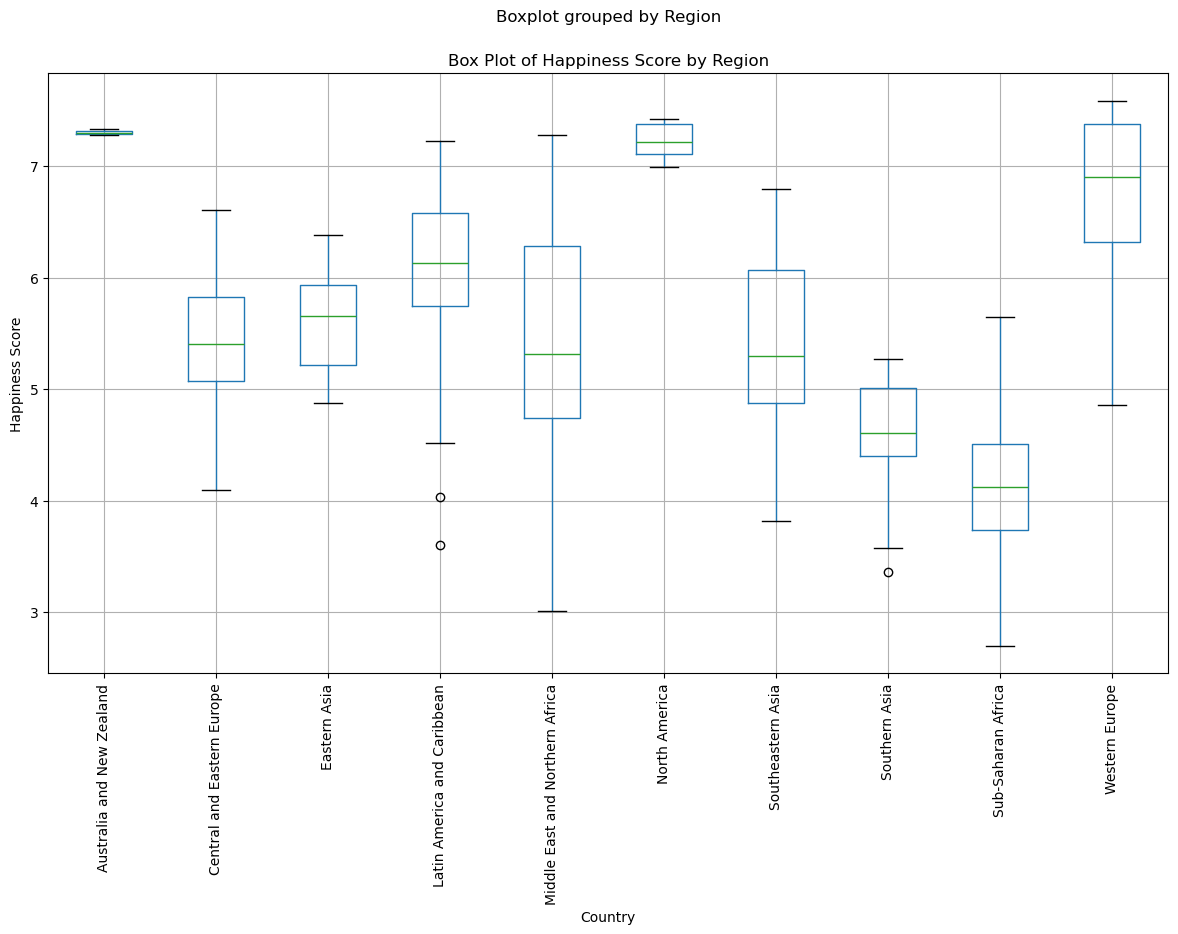

In [298]:
plt.figure(figsize=(3, 6))
df.boxplot(column='Happiness Score', by='Region', figsize=(14, 8), rot=90)
plt.title('Box Plot of Happiness Score by Region')
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.xticks(fontsize=10)
plt.grid(True)
plt.show()

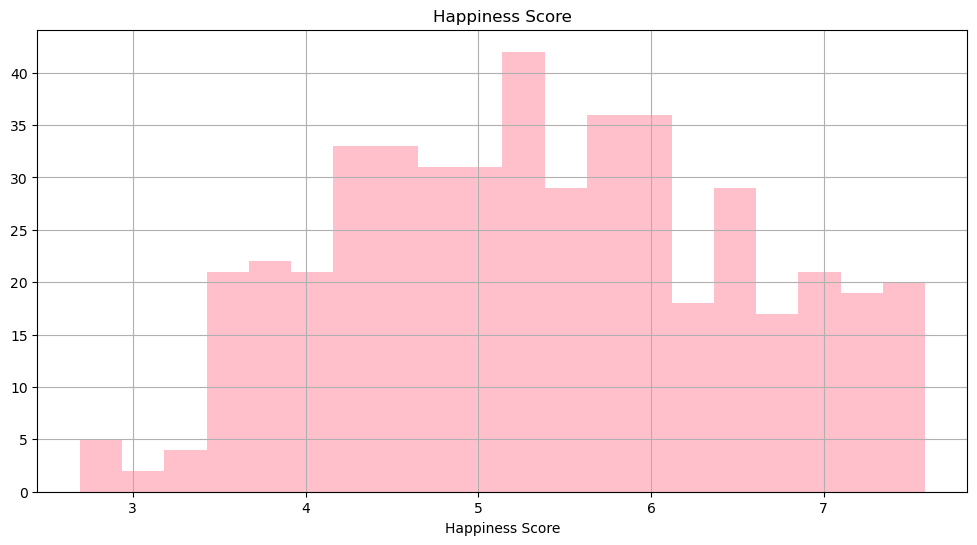

In [311]:
plt.figure(figsize=(12, 6))
plt.hist(df['Happiness Score'], bins=20, color='pink')
plt.title('Happiness Score')
plt.xlabel('Happiness Score')
plt.grid(True)
plt.show()

### 2. Univariate Non-Graphical analysis: 

- Where is the center of the data? (location) --> **Measures of central tendency**
- How much does the data vary? (scale) --> **Measure of variability**
- What is the shape of the data? (shape) --> **Measures of variation combined with an average (measure of center) gives a good picture of the distribution of the data.**

## 4. Bivariate/Multivariate Analysis:

Here, you look at the relationships between two or more variables. This can involve looking for correlations, patterns, and trends that suggest a relationship or an association.

We can perform bi-variate analysis for any combination of categorical and numerical variables. The combination can be:
| bi-variate variables   | Plot type |
| ------------- | ------------- |
| Categorical & Categorical| Stacked Bar Chart |
| Categorical & numerical  | scatter plot, histogram, box plot|
| numerical  & numerical  | Scatter plot, line chart| 


Multivariate Analysis:
- Heat map
- Bar Chart
- Scatter Chart
- Line Chart

**Categorical & Categorical --> (Stacked Column Chart)**

**Categorical & numerical --> (scatter plot, histogram, box plot)**

**numerical & numerical --> (Scatter plot, line chart)**

We could also use a correlation matrix to get more specific information about the relationship between these two variables.